<a href="https://colab.research.google.com/github/abduhsalam/Customer-Segmentation-Clustering/blob/main/Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator*


---




# **Clustering**

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

Here we model the clustering from customer income and spend data. We use this model to perform customer segmentation. We differentiate customers into the optimum number of groups based on their shared income and spend.

### **Import Libraries**

In [67]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Raw Dataset**

In [68]:
# Import Dataset
df = pd.read_csv('https://raw.githubusercontent.com/abduhsalam/Customer-Segmentation-Clustering/main/Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [69]:
# Prints the Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [70]:
# Prints Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


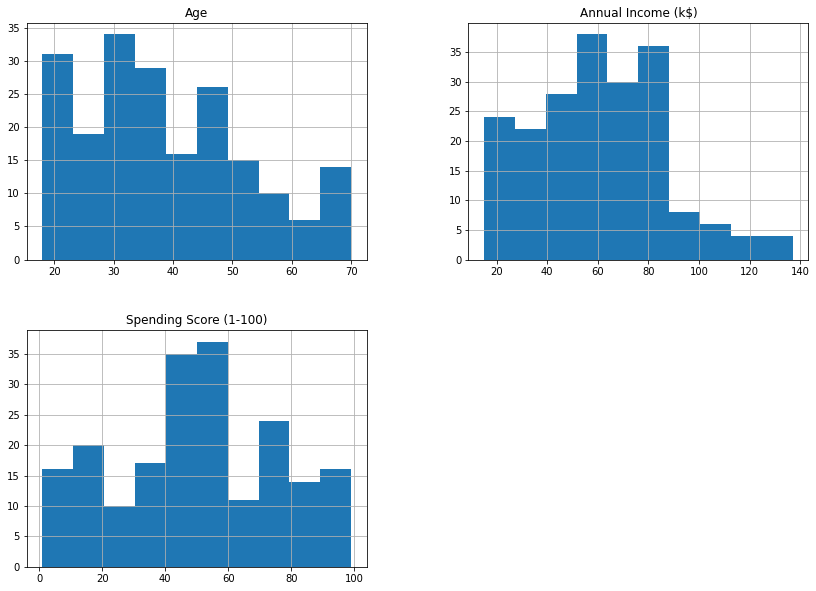

In [71]:
import matplotlib.pyplot as plt

df.drop(['CustomerID'],axis=1).hist(figsize=(14,10))
plt.show()

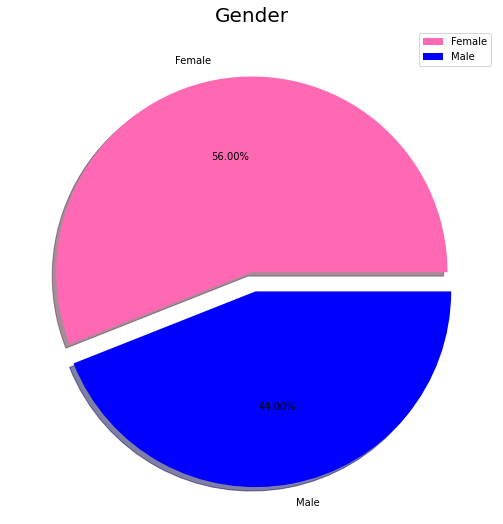

In [72]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['#FF69B4', 'blue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## **K-Means Clustering**

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

# Segmentation using age and spending score

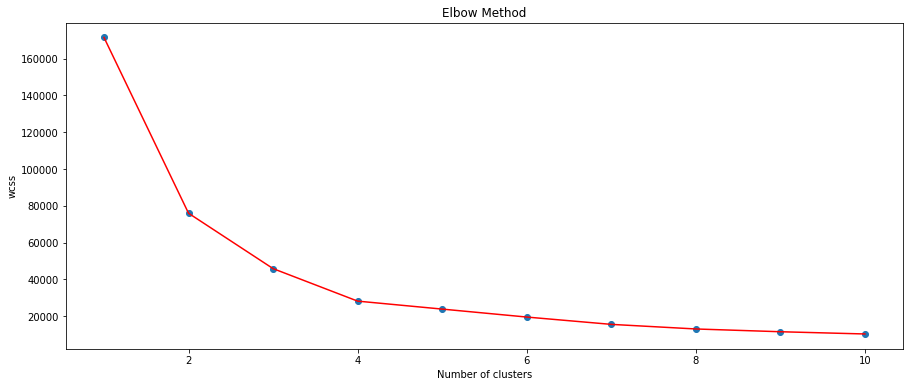

In [73]:
# Transform Data Frame to Numpy Array
age_spend = df[['Age', 'Spending Score (1-100)']].to_numpy()

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(age_spend)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1,11),wcss, 'o')
plt.plot(range(1,11),wcss, color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [74]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

temp = 0
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(age_spend)
    label = kmeans.labels_
    sil_coeff = silhouette_score(age_spend, label, metric='euclidean')
    if (sil_coeff > temp):
      temp = sil_coeff
      best = n_cluster
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))
print('\nBest Cluster = ',best)

For n_clusters=2, The Silhouette Coefficient is 0.4692341232501655
For n_clusters=3, The Silhouette Coefficient is 0.45300127016521263
For n_clusters=4, The Silhouette Coefficient is 0.49973941540141753
For n_clusters=5, The Silhouette Coefficient is 0.46342248553207704
For n_clusters=6, The Silhouette Coefficient is 0.44418989442824364
For n_clusters=7, The Silhouette Coefficient is 0.4212938931368575
For n_clusters=8, The Silhouette Coefficient is 0.4243742180468121
For n_clusters=9, The Silhouette Coefficient is 0.41855958245139696
For n_clusters=10, The Silhouette Coefficient is 0.40940606531694046

Best Cluster =  4


**Modeling K-Means**

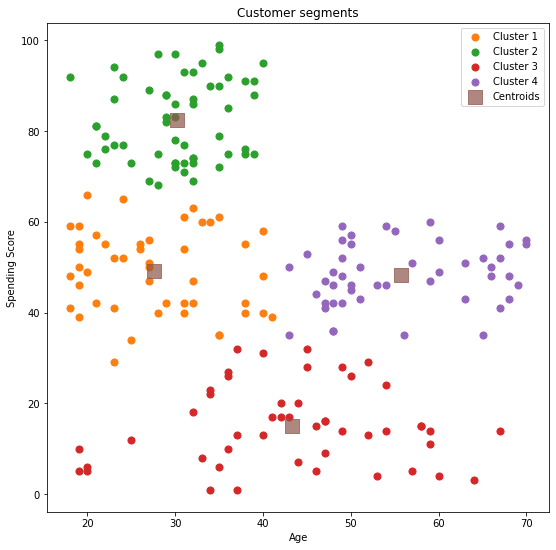

In [75]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(age_spend)

# Visualising Clusters for k=3
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.scatter(age_spend[cluster == 0, 0], age_spend[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(age_spend[cluster == 1, 0], age_spend[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(age_spend[cluster == 2, 0], age_spend[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(age_spend[cluster == 3, 0], age_spend[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

**Hierarchical Clustering**

Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

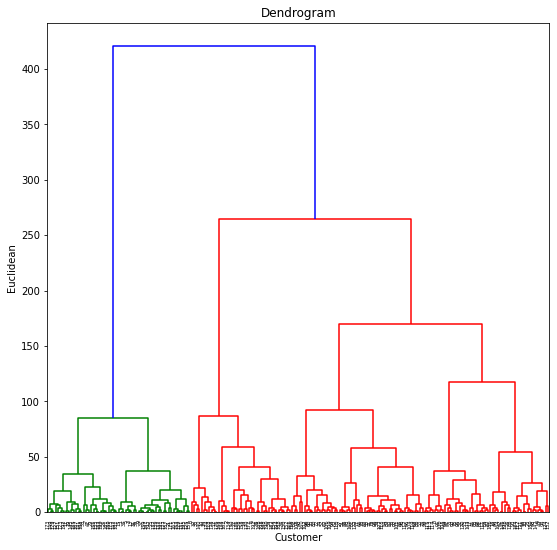

In [76]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(age_spend, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

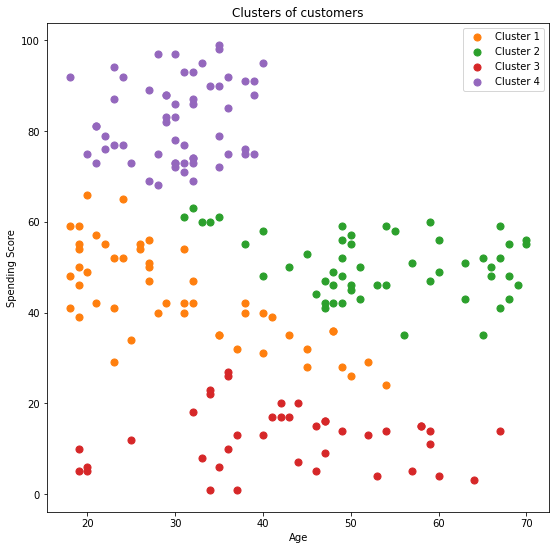

In [77]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(age_spend)

# Visualising Clusters for k=3
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.scatter(age_spend[hcluster == 0, 0], age_spend[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(age_spend[hcluster == 1, 0], age_spend[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(age_spend[hcluster == 2, 0], age_spend[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(age_spend[hcluster == 3, 0], age_spend[hcluster == 3, 1], s = 50, label = 'Cluster 4')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Berdasarkan hasil clustering plot antara age dan spending score, terdapat 4 cluster dimana terdapat 
- cluster customer biasa dengan spend yang tergolong biasa, 
- cluster target customer dengan umur <= 40 dengan spend tingkat medium, 
- cluster target dengan umur > 40 yang menghabiskan spend tingkat medium,
- cluster prioritas dengan tingkat spend yang tinggi

dengan adanya pola ini dapat dibuat marketing strategy dan kebijakan-kebijakan sesuai dengan setiap cluster customer.

# Segmentation using Annual Income and spending score

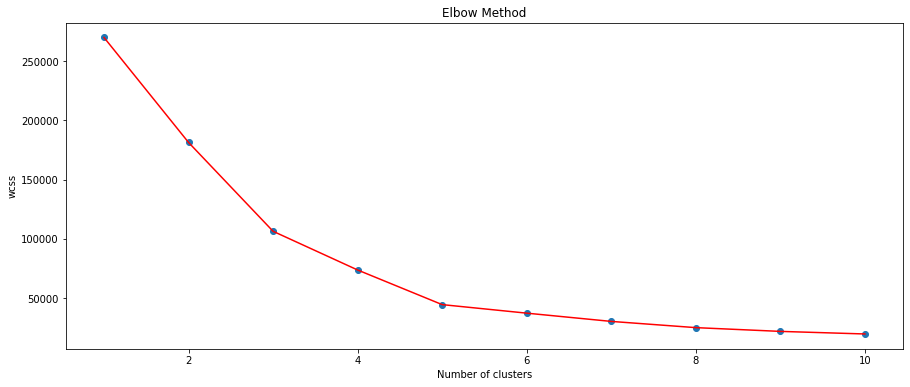

In [89]:
# Transform Data Frame to Numpy Array
income_spend = df[['Annual Income (k$)','Spending Score (1-100)']].to_numpy()

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income_spend)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.figure(1 , figsize = (15 ,6))
plt.plot(range(1,11),wcss, 'o')
plt.plot(range(1,11),wcss, color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [90]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

temp = 0
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income_spend)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income_spend, label, metric='euclidean')
    if (sil_coeff > temp):
      temp = sil_coeff
      best = n_cluster
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))
print('\nBest Cluster = ',best)

For n_clusters=2, The Silhouette Coefficient is 0.2968969162503008
For n_clusters=3, The Silhouette Coefficient is 0.46761358158775435
For n_clusters=4, The Silhouette Coefficient is 0.4931963109249047
For n_clusters=5, The Silhouette Coefficient is 0.553931997444648
For n_clusters=6, The Silhouette Coefficient is 0.53976103063432
For n_clusters=7, The Silhouette Coefficient is 0.5264283703685728
For n_clusters=8, The Silhouette Coefficient is 0.45732611752686836
For n_clusters=9, The Silhouette Coefficient is 0.4605043439759829
For n_clusters=10, The Silhouette Coefficient is 0.44772437161950956

Best Cluster =  5


Modelling K-Means

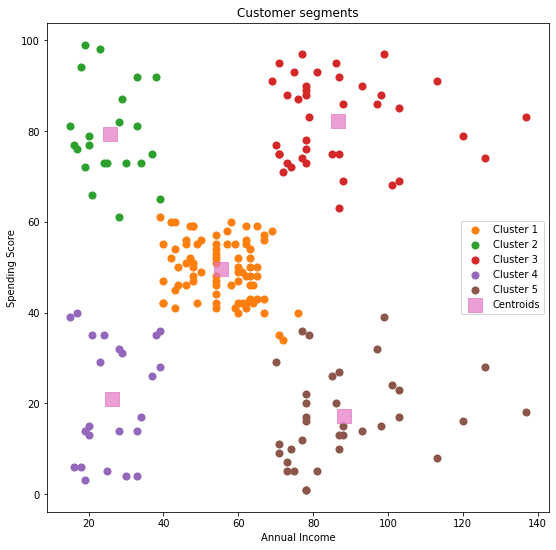

In [91]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income_spend)

# Visualising Clusters for k=3
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.scatter(income_spend[cluster == 0, 0], income_spend[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income_spend[cluster == 1, 0], income_spend[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income_spend[cluster == 2, 0], income_spend[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(income_spend[cluster == 3, 0], income_spend[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(income_spend[cluster == 4, 0], income_spend[cluster == 4, 1], s = 50, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Hierarchical Clustering

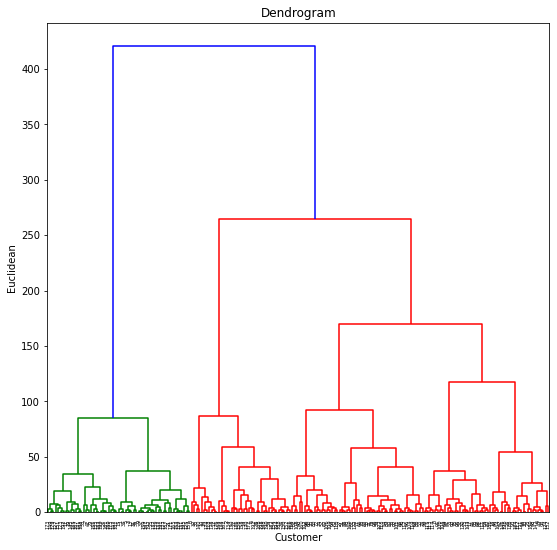

In [92]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(age_spend, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

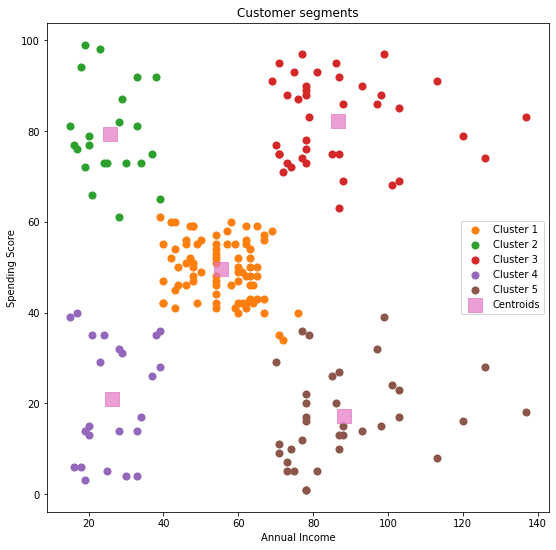

In [93]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(income_spend)

# Visualising Clusters for k=3
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.scatter(income_spend[cluster == 0, 0], income_spend[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income_spend[cluster == 1, 0], income_spend[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income_spend[cluster == 2, 0], income_spend[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(income_spend[cluster == 3, 0], income_spend[cluster == 3, 1], s = 50, label = 'Cluster 4')
plt.scatter(income_spend[cluster == 4, 0], income_spend[cluster == 4, 1], s = 50, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

berdasarkan clustering plot antara annual income dan spending score. terdapat 5 cluster yaitu:
- pendapatan tinggi dengan spend rendah
- pendapatan rendah dengan spend rendah
- pendapatan rendah dengan spend tinggi
- pendapatan sedang dengan spend sedang
- pendapatan tinggi dengan spend tinggi

annual income dan spending score merupakan faktor terbaik untuk menemukan customer segmentation.